# Machine Learning (Updated)

## Problem:
To find out if the machine learning models can classify the keywords of movies and predict the genre of the movie in a test set correctly.

If machine learning can predict the genre correctly, it means there is relevance between the keywords and the genre.
This means there is a way to predict the genre just with keywords, solving our objective.


In [2]:
import pandas as pd
import numpy as np
import json
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
df= pd.read_excel('alpha_occur_cleaned_data.xlsx')
df.head()

,title,id,genres,keywords
0,Blondie,3924,['Comedy'],['blondi']
1,Four Rooms,5,"['Crime', 'Comedy']","['hotel', ""new year's ev"", 'witch', 'bet', 'ho..."
2,Judgment Night,6,"['Action', 'Thriller', 'Crime']","['chicago, illinoi', 'drug deal', 'escap', 'on..."
3,Star Wars,11,"['Adventure', 'Action', 'Science Fiction']","['android', 'galaxi', 'hermit', 'death star', ..."
4,Finding Nemo,12,"['Animation', 'Family']","['parent child relationship', 'sydney, austral..."


In [4]:
df.shape

(19293, 4)

### String processing.

'genres' in csv/xlsx was stored as string instead of a list

In [5]:
# Using ast to convert genres from string to list.
import ast
# For loop on all the strings
for i in range(df.shape[0]):
    df['genres'][i] = ast.literal_eval(df['genres'][i])

<ipython-input-5-35f61ed1e178>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'][i] = ast.literal_eval(df['genres'][i])


In [6]:
df.head()

,title,id,genres,keywords
0,Blondie,3924,[Comedy],['blondi']
1,Four Rooms,5,"[Crime, Comedy]","['hotel', ""new year's ev"", 'witch', 'bet', 'ho..."
2,Judgment Night,6,"[Action, Thriller, Crime]","['chicago, illinoi', 'drug deal', 'escap', 'on..."
3,Star Wars,11,"[Adventure, Action, Science Fiction]","['android', 'galaxi', 'hermit', 'death star', ..."
4,Finding Nemo,12,"[Animation, Family]","['parent child relationship', 'sydney, austral..."


In [7]:
# String processing on 'keywords'. Remove whitespaces
for i in range(df.shape[0]):
    df['keywords'][i] = df['keywords'][i].replace(" ", "")

<ipython-input-7-a014b36b4b05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keywords'][i] = df['keywords'][i].replace(" ", "")


In [8]:
df.head(100)

,title,id,genres,keywords
0,Blondie,3924,[Comedy],['blondi']
1,Four Rooms,5,"[Crime, Comedy]","['hotel',""newyear'sev"",'witch','bet','hotelroo..."
2,Judgment Night,6,"[Action, Thriller, Crime]","['chicago,illinoi','drugdeal','escap','onenigh..."
3,Star Wars,11,"[Adventure, Action, Science Fiction]","['android','galaxi','hermit','deathstar','jedi..."
4,Finding Nemo,12,"[Animation, Family]","['parentchildrelationship','sydney,australia',..."
...,...,...,...,...
95,Star Trek V: The Final Frontier,172,"[Science Fiction, Action, Adventure, Thriller]","['feder','lossoflovedon','selfsacrific','hosta..."
96,"20,000 Leagues Under the Sea",173,"[Adventure, Drama, Family, Fantasy, Science Fi...","['dive','ocean','submarin','julesvern','captai..."
97,Star Trek VI: The Undiscovered Country,174,"[Science Fiction, Action, Adventure, Thriller]","['farewel','feder','courtcas','plan','spaceope..."
98,Saw,176,"[Horror, Mystery, Crime]","['detect','shotgun','flashback','hospit','doct..."


### sanity check

In [9]:
df['genres'][10000][0]

'Comedy'

In [10]:
df['keywords'][2]

"['chicago,illinoi','drugdeal','escap','onenight','box']"

## Multi-Label Classification 
### Problem Transformation : Binary Relevance

Each target variable (genre) is treated independently.
Multi-label classification reduced to n classification problems


MultiLabelBinarizer module transforms iterable of iterables to a binary matrix.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

# transform target variable
multilabel_binarizer = MultiLabelBinarizer()
y = multilabel_binarizer.fit_transform(df['genres'])

In [12]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
y.shape

(19293, 19)

19 Genres encoded

### Split dataset into training and test set

In [14]:
# split 
X_train, X_test, y_train, y_test = train_test_split(df['keywords'], y, test_size=0.2, random_state=9)

In [15]:
X_train

6576         ['terrorist','undercov','lasvega','showgirl']
8502           ['journalist','rockstar','music','concert']
16532                                    ['privatedetect']
3481     ['supercomput','computerprogram','destini','ti...
8215                    ['robberi','bank','love','murder']
                               ...                        
4532     ['judg','juror','deathpenalti','revel','righta...
4673     ['virgin','colleg','pregnanc','yoga','bikini',...
5014                                 ['worldwarii','tank']
9979     ['neonaz','prison','gallow','coffe','auschwitz...
501      ['suicid','paranoia','blackmarket','hallucin',...
Name: keywords, Length: 15434, dtype: object

In [16]:
y_train

array([[1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Tf-idf vectorizer
https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction 

In [17]:
# create TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# For test set, transform into document-term matrix without learning vocabulary dictionary
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [18]:
X_train_tfidf

<15434x5235 sparse matrix of type '<class 'numpy.float64'>'
	with 82783 stored elements in Compressed Sparse Row format>

### Performance Metric
- F1 score
- Hamming Loss

In [19]:
# Performance metric function
import sklearn.metrics as metrics
def calculate_metrics(y_test, y_pred):
    br_f1=metrics.f1_score(y_test, y_pred, average='micro')
    br_hamm=metrics.hamming_loss(y_test,y_pred)
    return br_f1, br_hamm

def print_metrics(f1, hamm):
    print('F1-score:',round(f1,3))
    print('Hamming Loss:',round(hamm,3))



## Binary relevance (Updated)
Using scikit-multilearn library
http://scikit.ml/api/skmultilearn.problem_transform.br.html 

Random Forest

In [20]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier

classifier_RF = BinaryRelevance(
    classifier = RandomForestClassifier(),
    require_dense = [False, True]
)

classifier_RF.fit(X_train_tfidf, y_train)


BinaryRelevance(classifier=RandomForestClassifier(),
                require_dense=[False, True])

In [21]:
y_pred = classifier_RF.predict(X_test_tfidf)

In [22]:
RF_f1, RF_hamm = calculate_metrics(y_test, y_pred)
print_metrics(RF_f1, RF_hamm)

F1-score: 0.5
Hamming Loss: 0.096


SVC

In [23]:
from sklearn.svm import SVC

classifier_SVC = BinaryRelevance(
    classifier = SVC(),
    require_dense = [False, True]
)

classifier_SVC.fit(X_train_tfidf, y_train)

BinaryRelevance(classifier=SVC(), require_dense=[False, True])

In [24]:
# make predictions for test set
y_pred = classifier_SVC.predict(X_test_tfidf)

In [25]:
SVC_f1, SVC_hamm = calculate_metrics(y_test, y_pred)
print_metrics(SVC_f1, SVC_hamm)

F1-score: 0.483
Hamming Loss: 0.091


In [26]:
# Using other classifiers
from sklearn.linear_model import LogisticRegression

classifier_LR = BinaryRelevance(
    classifier = LogisticRegression(),
    require_dense = [False, True]
)

classifier_LR.fit(X_train_tfidf, y_train)

BinaryRelevance(classifier=LogisticRegression(), require_dense=[False, True])

In [27]:
y_pred = classifier_LR.predict(X_test_tfidf)


In [28]:
LR_f1, LR_hamm = calculate_metrics(y_test, y_pred)
print_metrics(LR_f1, LR_hamm)

F1-score: 0.456
Hamming Loss: 0.094


## Predict a movie example on test set

Application

In [29]:
def infer_tags(q):
    q_vec = tfidf_vectorizer.transform([q])
    q_pred_RF = classifier_RF.predict(q_vec)
    q_pred_SVC = classifier_SVC.predict(q_vec)
    q_pred_LR = classifier_LR.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred_RF), multilabel_binarizer.inverse_transform(q_pred_SVC), multilabel_binarizer.inverse_transform(q_pred_LR)

In [202]:
for i in range(3):
    k = X_test.sample(1).index[0]
    RFpredict,SVCpredict, LRpredict  = infer_tags(X_test[k])
    print("Movie: ", df['title'][k])
    print("\nKeywords: ", df['keywords'][k] )
    print("\nPredicted genre using: ")
    print("Random Forest : ",  RFpredict )
    print("SVC : ",  SVCpredict )
    print("Logistic Regression : ",  LRpredict )
    print("Actual genre: ", df['genres'][k], "\n")
    print("//////////////////////////////////////////////////////////")

Movie:  Rush Hour 2

Keywords:  ['martialart','losangeles,california','criminalinvestig','interracialfriendship','buddycop','duringcreditssting','actionhero','goodversusevil']

Predicted genre using: 
Random Forest :  [('Action', 'Comedy', 'Crime')]
SVC :  [('Action', 'Comedy', 'Crime')]
Logistic Regression :  [('Action', 'Comedy')]
Actual genre:  ['Action', 'Comedy', 'Crime'] 

//////////////////////////////////////////////////////////
Movie:  Definitive Jux Presents The Revenge of the Robots

Keywords:  ['hip-hop']

Predicted genre using: 
Random Forest :  [('Documentary', 'Music')]
SVC :  [('Music',)]
Logistic Regression :  [()]
Actual genre:  ['Documentary', 'Music'] 

//////////////////////////////////////////////////////////
Movie:  My Name Is Julia Ross

Keywords:  ['kidnap','cornwall,england','noir','secretari','mentalil']

Predicted genre using: 
Random Forest :  [('Drama',)]
SVC :  [('Drama',)]
Logistic Regression :  [('Drama',)]
Actual genre:  ['Mystery'] 

/////////////////

## Observation

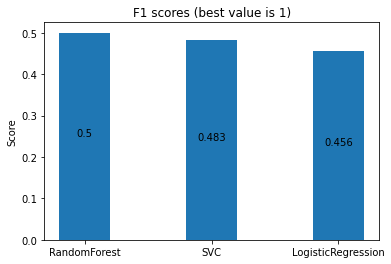

In [36]:
# Bar plot f1
classifiers = ['RandomForest', 'SVC', 'LogisticRegression']
f1_group = [RF_f1, SVC_f1, LR_f1]
f1_group_round = [ round(x,3) for x in f1_group]
hamm_group = [RF_hamm, SVC_hamm, LR_hamm]
hamm_group_round = [ round(x,3) for x in hamm_group]
x = np.arange(3)

fig, ax = plt.subplots()
rects1 = ax.bar(x, f1_group_round, width=0.4)

ax.set_ylabel('Score')
ax.set_title('F1 scores (best value is 1)')
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.bar_label(rects1, label_type='center', padding=3)
plt.show()

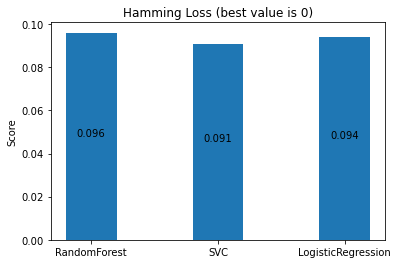

In [37]:
# barplot Hamming loss
fig, ax = plt.subplots()
rects2 = ax.bar(x, hamm_group_round, width=0.4)

ax.set_ylabel('Score')
ax.set_title('Hamming Loss (best value is 0)')
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.bar_label(rects2, label_type='center', padding=3)
plt.show()